In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Temporal analysis

## Averages by day

In [2]:
df =pd.read_parquet("./data/year=2024/part.180.parquet")

In [3]:
df["day_of_week"] = df["pickup_datetime"].dt.dayofweek
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_names)


In [4]:
# Count rides per day
daily_counts = df.groupby(df['pickup_datetime'].dt.date).size().reset_index(name='ride_count')

# Extract weekday again from grouped dates
daily_counts['day_of_week'] = pd.to_datetime(daily_counts['pickup_datetime']).dt.dayofweek
daily_counts['day_name'] = daily_counts['day_of_week'].map(day_names)

# Average ride count per weekday
weekly_avg = daily_counts.groupby('day_name')['ride_count'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)


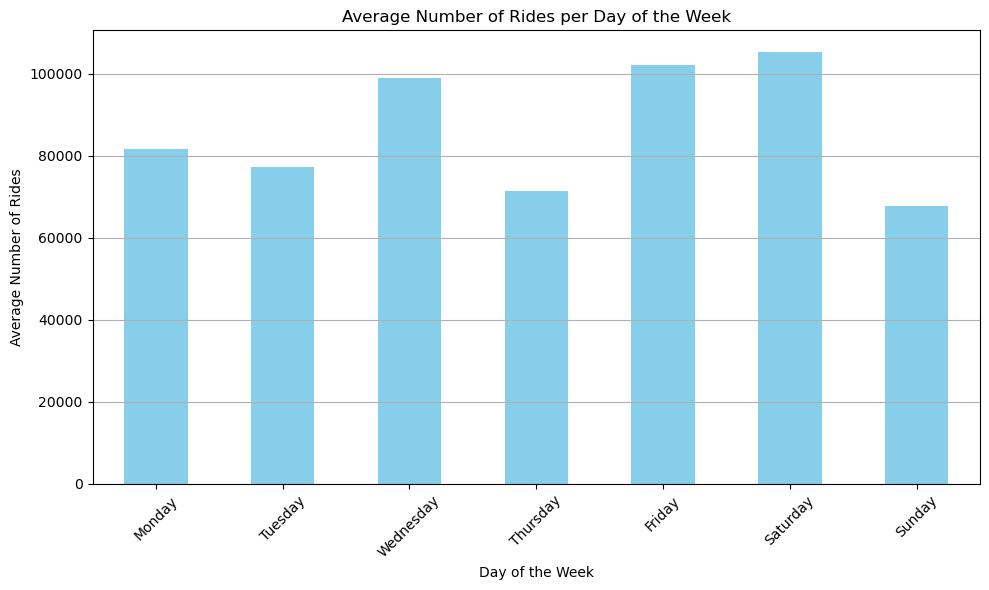

In [5]:
plt.figure(figsize=(10, 6))
weekly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Number of Rides per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Rides')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Averages by hour

In [6]:
df['hour'] = df['pickup_datetime'].dt.hour


In [7]:
# Count number of rides per date and hour
df['date'] = df['pickup_datetime'].dt.date
rides_per_hour = df.groupby(['date', 'hour']).size().reset_index(name='ride_count')

# Now calculate average rides for each hour across all days
hourly_avg = rides_per_hour.groupby('hour')['ride_count'].mean()


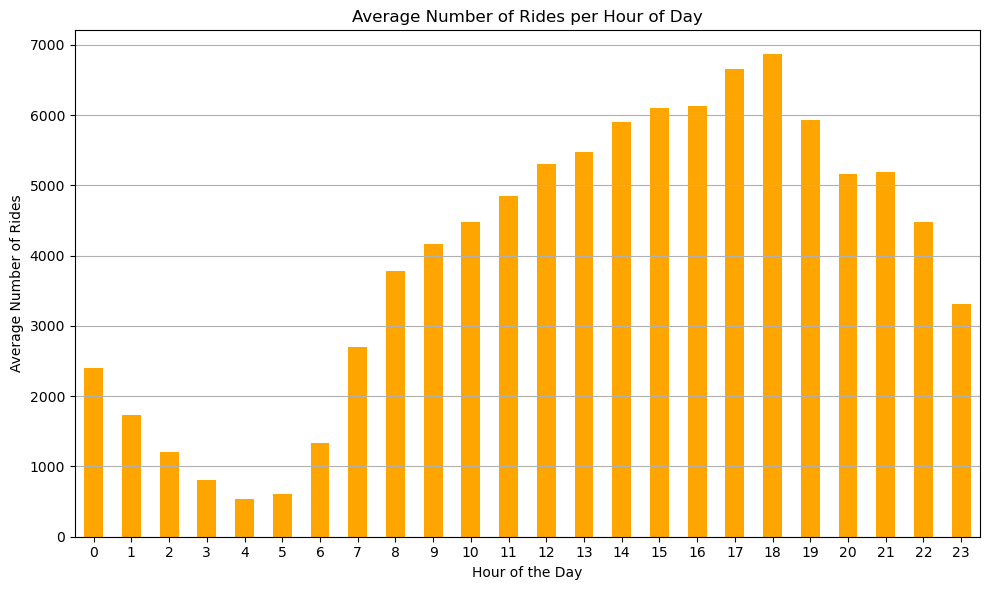

In [8]:
plt.figure(figsize=(10, 6))
hourly_avg.plot(kind='bar', color='orange')
plt.title('Average Number of Rides per Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Rides')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Annual trends

In [9]:
df['year'] = df['pickup_datetime'].dt.year


In [10]:
# Count rides per day
df['date'] = df['pickup_datetime'].dt.date
daily_counts = df.groupby(['date']).size().reset_index(name='ride_count')
daily_counts['year'] = pd.to_datetime(daily_counts['date']).dt.year

# Calculate average number of rides per day in each year
yearly_avg = daily_counts.groupby('year')['ride_count'].mean()


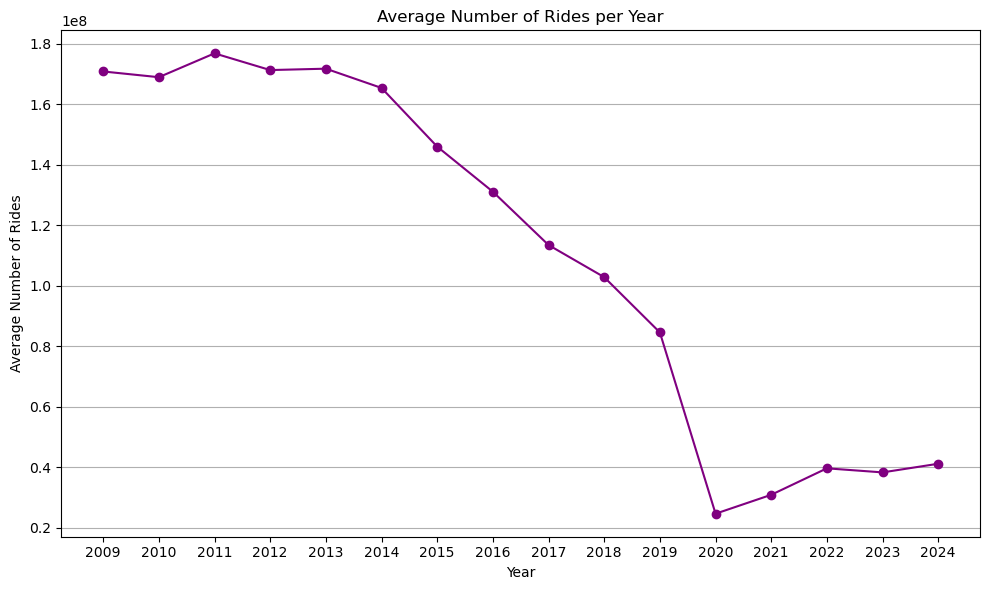

In [6]:
import matplotlib.pyplot as plt
rides = [170896055.00, 169001162.00, 176887259.00, 171359007.00, 171816340.00, 165447579.00, 146039231.00, 131131805.00, 113500327.00, 102871387.00, 84598444.00, 24649092.00, 30904308.00, 39656098.00, 38310226.00, 41169720.00] 
years = range(2009, 2025)

# plot rides vs years
plt.figure(figsize=(10, 6))
plt.plot(years, rides, marker='o', color='purple')
plt.title('Average Number of Rides per Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Rides')
plt.xticks(years)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Geographic location

In [14]:
df.dropna(subset=['pickup_latitude', 'dropoff_longitude', 'pickup_longitude', 'dropoff_latitude'], inplace=True)

In [21]:
import folium
from folium.plugins import HeatMap

# Center map on NYC
nyc_map = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Create a list of [lat, lon] for pickup points
pickup_points = df[['pickup_latitude', 'pickup_longitude']].values.tolist()

# Add heatmap layer
HeatMap(pickup_points[:200000], radius=8, max_zoom=13).add_to(nyc_map)

# Save to HTML
nyc_map.save("pickup_heatmap.html")


In [22]:
import folium
from folium.plugins import HeatMap

# Center map on NYC
nyc_map = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Create a list of [lat, lon] for pickup points
pickup_points = df[['dropoff_latitude', 'dropoff_longitude']].values.tolist()

# Add heatmap layer
HeatMap(pickup_points[:200000], radius=8, max_zoom=13).add_to(nyc_map)

# Save to HTML
nyc_map.save("dropoff_heatmap.html")


## Trip durations and cost

In [24]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'rate_code_id', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'airport_fee', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'day_of_week', 'day_name',
       'hour', 'date', 'year'],
      dtype='object')

In [25]:
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60.0

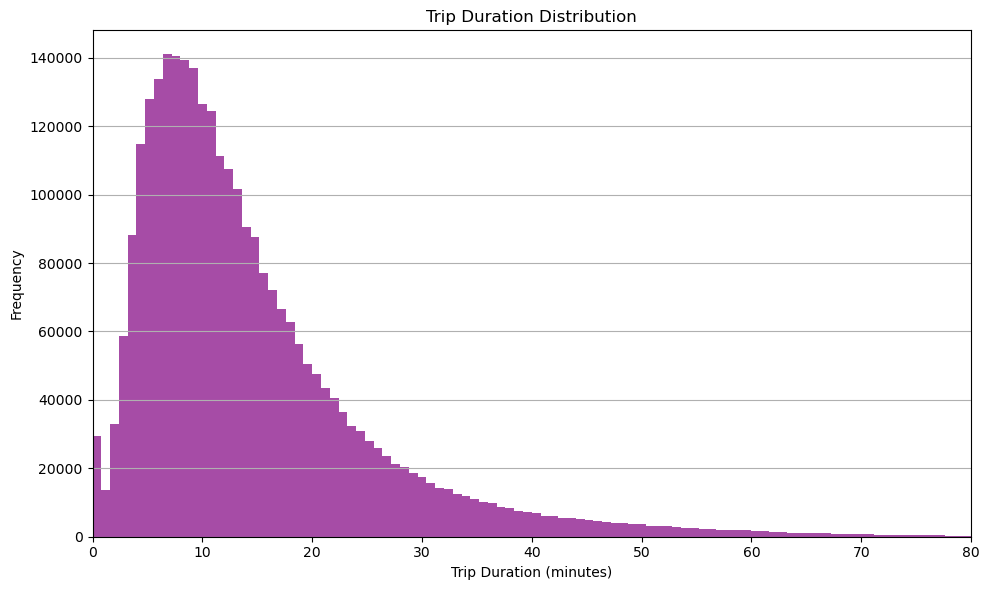

In [32]:
# Plot tri duration distribution
plt.figure(figsize=(10, 6))
plt.hist(df['trip_duration'], bins=100, color='purple', alpha=0.7, range=(0, 80))
plt.xlim(0, 80)  # Limit x-axis for better visibility
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [7]:
# Step 1: Add a 'year' column
df['year'] = pd.to_datetime(df['pickup_datetime']).dt.year

# Step 2: Group by year and calculate mean of each fare component
columns = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'congestion_surcharge', 'airport_fee', 'total_amount'
]

yearly_avg = df.groupby('year')[columns].mean()

# Step 3: Drop years with too few samples (optional)
yearly_avg = yearly_avg[yearly_avg['total_amount'] > 0]  # or set a threshold

# Step 4: Normalize components (excluding total_amount)
components = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'congestion_surcharge', 'airport_fee'
]

normalized = yearly_avg[components].div(yearly_avg['total_amount'], axis=0)


NameError: name 'df' is not defined

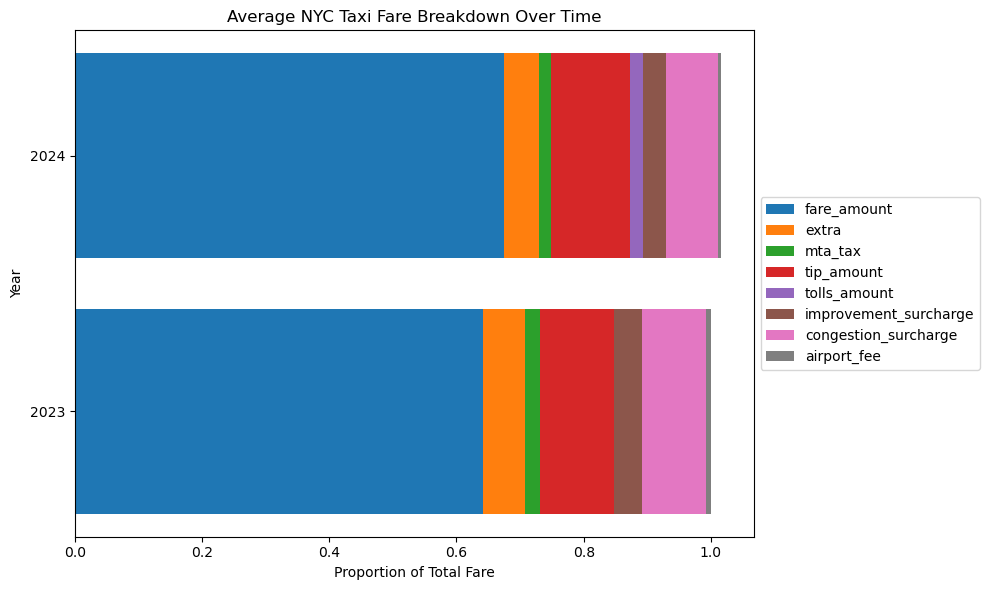

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Define a color map for consistency
colors = {
    'fare_amount': '#1f77b4',
    'extra': '#ff7f0e',
    'mta_tax': '#2ca02c',
    'tip_amount': '#d62728',
    'tolls_amount': '#9467bd',
    'improvement_surcharge': '#8c564b',
    'congestion_surcharge': '#e377c2',
    'airport_fee': '#7f7f7f',
}

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

bottom = np.zeros(len(normalized))
years = normalized.index

for component in components:
    ax.barh(years, normalized[component], left=bottom, label=component, color=colors[component])
    bottom += normalized[component].values

ax.set_xlabel('Proportion of Total Fare')
ax.set_ylabel('Year')
ax.set_title('Average NYC Taxi Fare Breakdown Over Time')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks([2023, 2024])
plt.tight_layout()
plt.show()


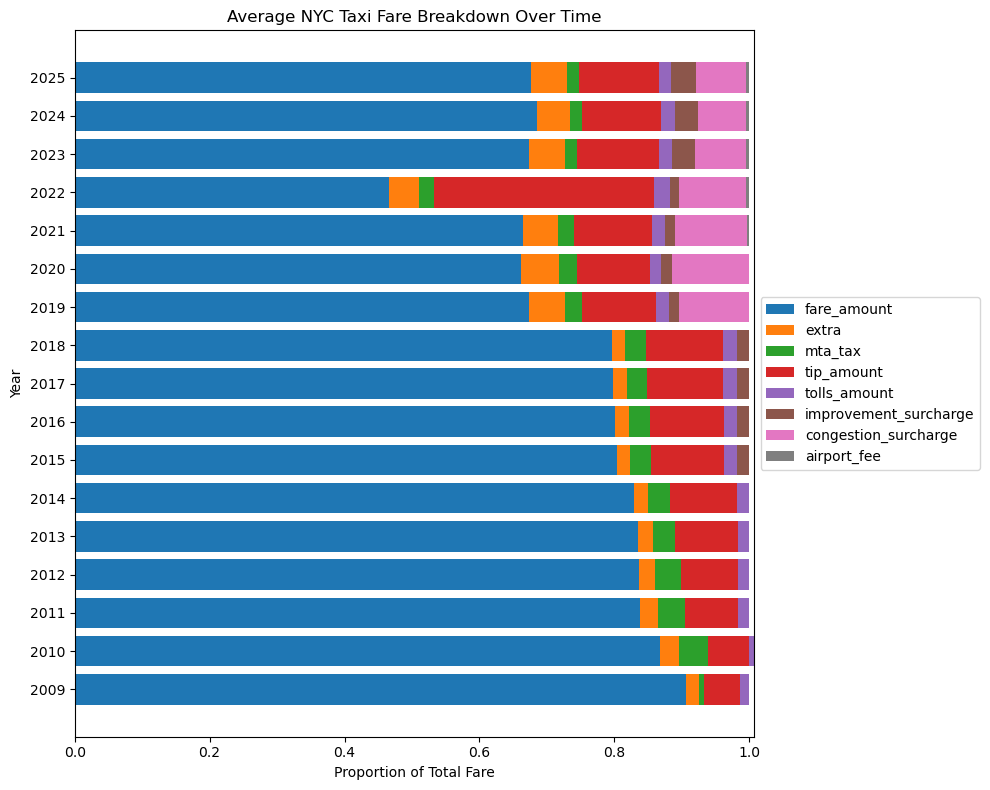

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Provided JSON data (assume it's stored in a variable called `data`)
import json

with open('average_rides_and_prices.json', 'r') as f:
    data = json.load(f)
# data = json.load("./average_rides_and_prices.json") # Paste your full JSON data here or load it from a file

# Extract years and breakdown into a DataFrame
years = sorted(data.keys())
components = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
              'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

rows = []
for year in years:
    year_data = data[year]['avg_price_breakdown']
    total = sum(year_data[c] for c in components)
    norm = {c: year_data[c] / total if total > 0 else 0 for c in components}
    norm['year'] = int(year)
    rows.append(norm)

normalized_df = pd.DataFrame(rows).set_index('year')

# Define a color map for consistency
colors = {
    'fare_amount': '#1f77b4',
    'extra': '#ff7f0e',
    'mta_tax': '#2ca02c',
    'tip_amount': '#d62728',
    'tolls_amount': '#9467bd',
    'improvement_surcharge': '#8c564b',
    'congestion_surcharge': '#e377c2',
    'airport_fee': '#7f7f7f',
}

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
bottom = np.zeros(len(normalized_df))
years = normalized_df.index

for component in components:
    ax.barh(years, normalized_df[component], left=bottom, label=component, color=colors[component])
    bottom += normalized_df[component].values

ax.set_xlabel('Proportion of Total Fare')
ax.set_ylabel('Year')
ax.set_title('Average NYC Taxi Fare Breakdown Over Time')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yticks(range(2009, 2026))
plt.tight_layout()
plt.show()


## Benchmarking

In [1]:
import pandas as pd

# Load a CSV sample (adjust the path as needed)
df = pd.read_parquet("./data/year=2024/part.181.parquet")

# Save in other formats
df.to_parquet("yellow_tripdata_sample.parquet", engine="pyarrow")
df.to_hdf("yellow_tripdata_sample.h5", key="data", mode="w")
df.to_csv("yellow_tripdata_sample.csv", index=False)


In [1]:
import time
import duckdb
import dask.dataframe as dd
from dask_sql import Context
import pandas as pd

# Query to run
QUERY = "SELECT passenger_count, AVG(total_amount) AS avg_total FROM data GROUP BY passenger_count"

# Results store
results = []

def benchmark(name, load_func, query_func):
    start = time.time()
    df = load_func()
    result = query_func(df)
    duration = time.time() - start
    print(f"{name} took {duration:.2f}s")
    results.append((name, duration))
    return result

# Pandas
benchmark(
    "pandas + csv",
    lambda: pd.read_csv("../yellow_tripdata_sample.csv"),
    lambda df: df.groupby("passenger_count")["total_amount"].mean().reset_index()
)

benchmark(
    "pandas + parquet",
    lambda: pd.read_parquet("../yellow_tripdata_sample.parquet"),
    lambda df: df.groupby("passenger_count")["total_amount"].mean().reset_index()
)

benchmark(
    "pandas + hdf5",
    lambda: pd.read_hdf("../yellow_tripdata_sample.h5", key="data"),
    lambda df: df.groupby("passenger_count")["total_amount"].mean().reset_index()
)

# Dask
benchmark(
    "dask + csv",
    lambda: dd.read_csv("../yellow_tripdata_sample.csv"),
    lambda df: df.groupby("passenger_count")["total_amount"].mean().compute()
)

benchmark(
    "dask + parquet",
    lambda: dd.read_parquet("../yellow_tripdata_sample.parquet"),
    lambda df: df.groupby("passenger_count")["total_amount"].mean().compute()
)

# Dask doesn't support HDF5 natively in parallel, skipping for large data

# DuckDB
benchmark(
    "duckdb + csv",
    lambda: "../yellow_tripdata_sample.csv",
    lambda path: duckdb.query(f"""
        SELECT passenger_count, AVG(total_amount) AS avg_total
        FROM read_csv_auto('{path}')
        GROUP BY passenger_count
    """).to_df()
)

benchmark(
    "duckdb + parquet",
    lambda: "../yellow_tripdata_sample.parquet",
    lambda path: duckdb.query(f"""
        SELECT passenger_count, AVG(total_amount) AS avg_total
        FROM read_parquet('{path}')
        GROUP BY passenger_count
    """).to_df()
)

# DuckDB supports reading from HDF via Pandas (not directly optimal)

# Dask SQL
""" benchmark(
    "dask-sql + parquet",
    lambda: dd.read_parquet("../yellow_tripdata_sample.parquet"),
    lambda df: (lambda ctx: ctx.sql(QUERY).compute())(Context().create_table("data", df))
) """

# Print all timings
print("\n--- Benchmark Results ---")
for name, dur in sorted(results, key=lambda x: x[1]):
    print(f"{name}: {dur:.2f} sec")


pandas + csv took 14.02s
pandas + parquet took 0.33s
pandas + hdf5 took 0.64s
dask + csv took 6.23s
dask + parquet took 0.36s
duckdb + csv took 1.90s
duckdb + parquet took 0.03s

--- Benchmark Results ---
duckdb + parquet: 0.03 sec
pandas + parquet: 0.33 sec
dask + parquet: 0.36 sec
pandas + hdf5: 0.64 sec
duckdb + csv: 1.90 sec
dask + csv: 6.23 sec
pandas + csv: 14.02 sec


pandas + csv took 13.65s
pandas + parquet took 0.37s
pandas + hdf5 took 0.91s
dask + csv took 5.99s
dask + parquet took 0.37s
duckdb + csv took 2.09s
duckdb + parquet took 0.03s